In [29]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import random
from scipy.stats import truncnorm

In [21]:
def generate_timeseries(length, with_sin=False, sin_length_ratio=0.2, sin_noise=False, randomize_sin_height=False):
    timeseries = np.random.normal(0, 0.5, length)

    if with_sin:
        sin_length = int(length*sin_length_ratio)
        
        sin_height_adjust = random.uniform(-1, 1) if randomize_sin_height else 0
        sin_noise = np.random.normal(-.05, .05, sin_length) if sin_noise else 0
            
        # Generate a sine wave
        t = np.linspace(0, 4*np.pi, sin_length)
        sine_wave = 0.2 * np.sin(t) + sin_noise
        sine_wave += sin_height_adjust
        patch_start = np.random.randint(0, length - len(t))
        patch_end = patch_start + len(t)
        timeseries[patch_start:patch_end] = sine_wave
        
    return timeseries

In [3]:
def get_truncated_normal(len, mean=0.5, sd=.2, low=0, upp=1):
    return truncnorm(
        (low - mean) / sd, (upp - mean) / sd, loc=mean, scale=sd).rvs(len)

In [27]:
def generate_dataset(ts_len, total, with_sin, sin_noise, randomize_sin_height=False):
    random_timeseries = [
        generate_timeseries(ts_len)
        for _ in range(total-with_sin)
    ]

    synthetic_error = get_truncated_normal(len=total-with_sin, mean=0.5, sd=0.1, low=0, upp=1)
    random_labels = np.c_[ synthetic_error, np.full((total-with_sin,), False) ]
    random_data = np.c_[ np.array(random_timeseries), random_labels] 
    
    sine_patch_timeseries = [
        generate_timeseries(ts_len, with_sin=True, sin_noise=sin_noise, randomize_sin_height=randomize_sin_height) 
        for _ in range(with_sin)
    ]

    sine_synth_error = get_truncated_normal(len=with_sin, mean=0.9, sd=0.05, low=0, upp=1)
    sine_labels = np.c_[ sine_synth_error, np.full((with_sin,), True) ]
    sine_data = np.c_[ np.array(sine_patch_timeseries), sine_labels ] 

    full_data = np.r_[ random_data, sine_data ]
    columns = list(range(0, ts_len)) + ['error', 'label']
    return pd.DataFrame(full_data, columns=columns)

In [5]:
def plot_random_series_helper(df):
    random_row = df.sample()
    datapoints = random_row.drop(columns=['label', 'error'])
    plt.plot(datapoints.values.flatten())
    plt.xlabel('Index')
    plt.ylabel('Value')
    plt.show()

In [6]:
def plot_error_distributions(df):
    bins = np.linspace(0, 1, 50)
    plt.hist(df[df['label']==0]['error'], bins, alpha=0.5, label='sin=false')
    plt.hist(df[df['label']==1]['error'], bins, alpha=0.5, label='sin=true')
    plt.legend(loc='upper right')
    plt.show()

### FIXED-Y, NO NOISE
200 series, 20 with sin

In [7]:
df_no_noise = generate_dataset(ts_len=150, total=200, with_sin=20, sin_noise=False)

In [8]:
df_no_noise.head(3)

,0,1,2,3,4,5,6,7,8,9,...,142,143,144,145,146,147,148,149,error,label
0,0.527655,0.424267,0.219460,-0.412586,-0.132437,0.255452,0.070135,0.376924,0.415081,-0.745647,...,-0.038545,-0.363483,-0.360740,0.675904,0.021278,0.217690,0.210809,0.509418,0.460438,0.0
1,0.186628,-0.238211,-0.836156,0.160043,-0.273347,-0.405225,1.027189,-0.003230,-0.195479,-0.587383,...,1.205264,0.084140,0.319290,0.166241,0.979158,0.296624,-0.382431,-0.252710,0.412913,0.0
2,-0.395831,0.487594,0.120270,0.533982,-1.005771,-0.321106,-0.622027,0.424598,-0.222027,-0.104054,...,0.236873,-0.310718,-0.258725,0.369238,0.393154,-0.216623,0.093773,0.303664,0.526573,0.0


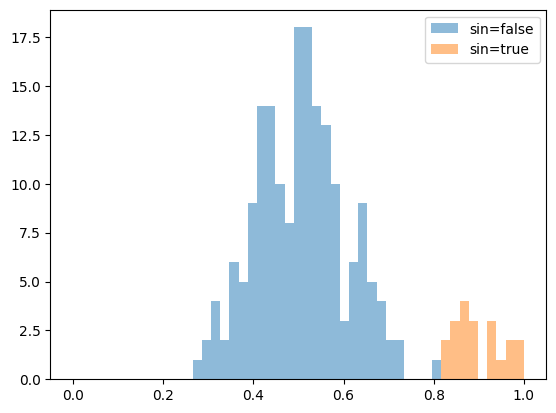

In [9]:
plot_error_distributions(df_no_noise)

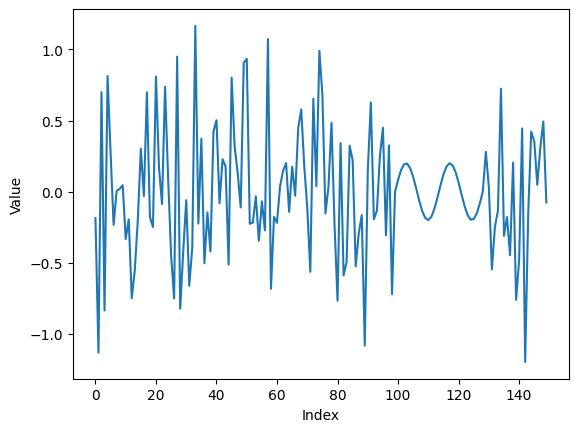

In [10]:
plot_random_series_helper(df=df_no_noise[df_no_noise['label']==1])

In [11]:
df_no_noise.to_csv('SIN_FIXED_NONOISE_200_20.csv', index=False)

### FIXED-Y, WITH NOISE
200 series, 20 with sin

In [22]:
df_w_noise = generate_dataset(ts_len=150, total=200, with_sin=20, sin_noise=True)

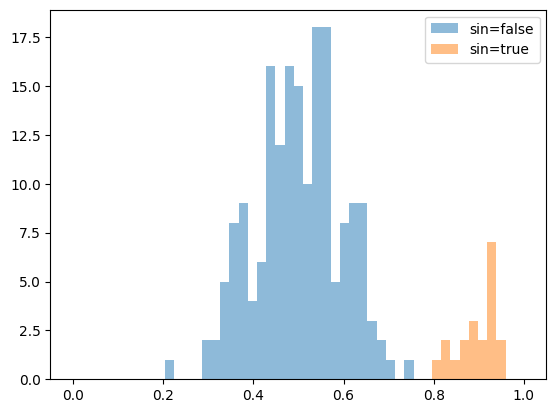

In [23]:
plot_error_distributions(df_w_noise)

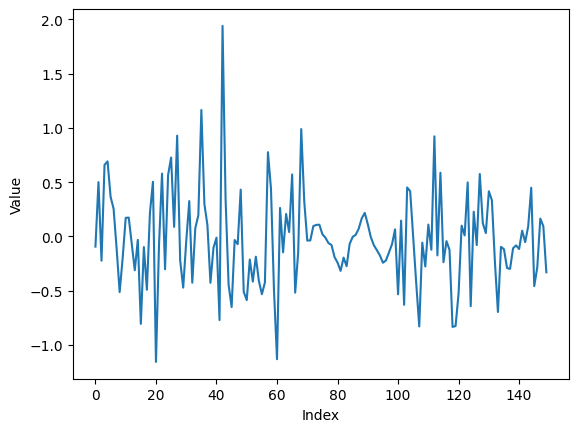

In [24]:
plot_random_series_helper(df=df_w_noise[df_w_noise['label']==1])

In [25]:
df_w_noise.to_csv('SIN_FIXED_WITHNOISE_200_20.csv', index=False)

### RANDOMIZED-Y, NO
200 series, 20 with sin

In [30]:
df_randy_nonoise = generate_dataset(ts_len=150, total=200, with_sin=20, sin_noise=False, randomize_sin_height=True)

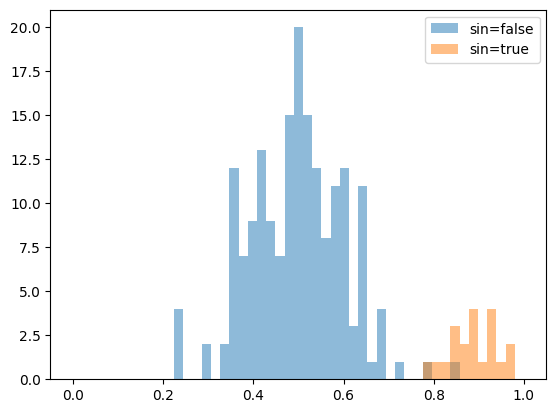

In [32]:
plot_error_distributions(df_randy_nonoise)

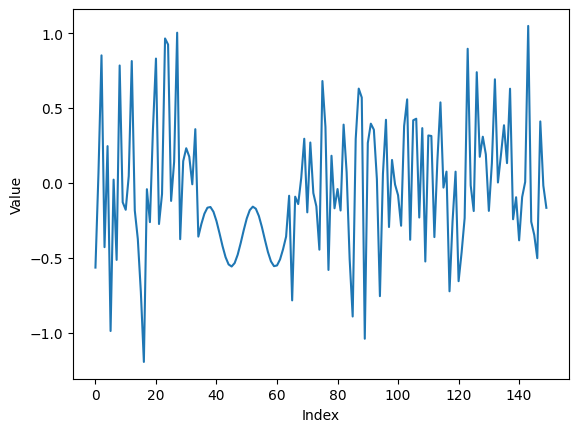

In [33]:
plot_random_series_helper(df=df_randy_nonoise[df_randy_nonoise['label']==1])

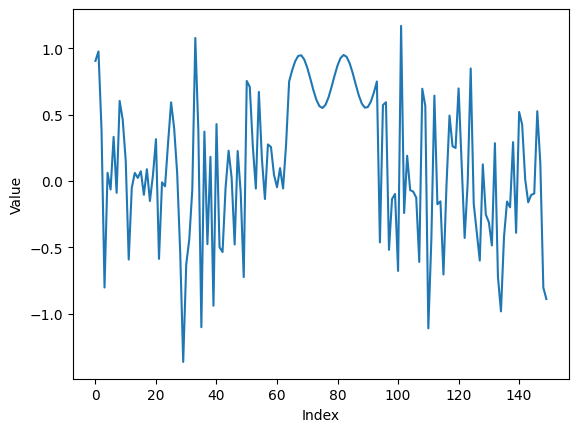

In [34]:
plot_random_series_helper(df=df_randy_nonoise[df_randy_nonoise['label']==1])

In [35]:
df_randy_nonoise.to_csv('SIN_RANDY_NONOISE_200_20.csv', index=False)

### RANDOMIZED-Y, WITH NOISE
200 series, 20 with sin

In [37]:
df_randy_wnoise = generate_dataset(ts_len=150, total=200, with_sin=20, sin_noise=True, randomize_sin_height=True)

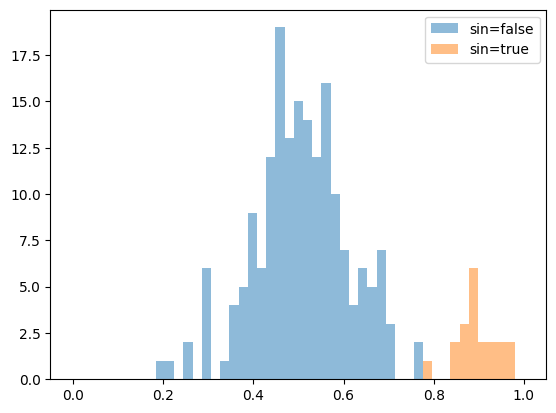

In [38]:
plot_error_distributions(df_randy_wnoise)

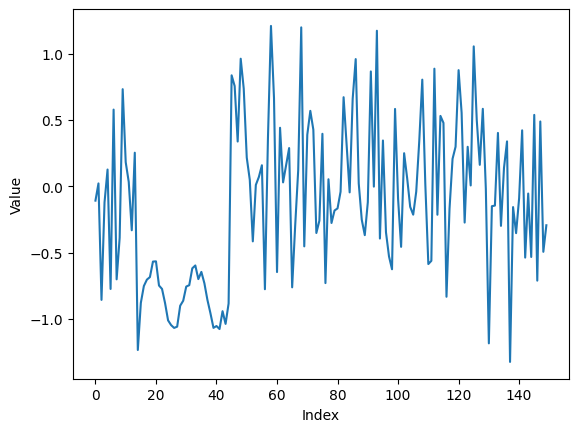

In [39]:
plot_random_series_helper(df=df_randy_wnoise[df_randy_wnoise['label']==1])

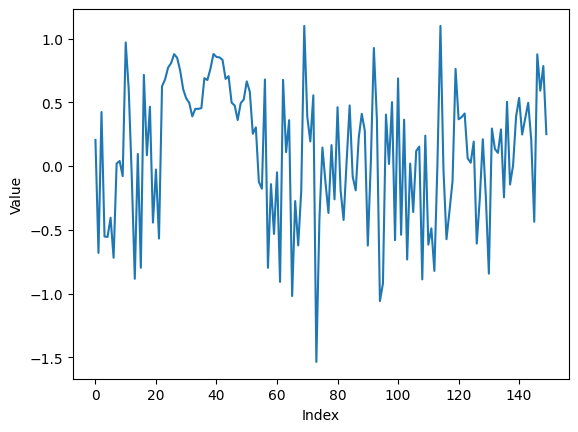

In [40]:
plot_random_series_helper(df=df_randy_wnoise[df_randy_wnoise['label']==1])

In [41]:
df_randy_wnoise.to_csv('SIN_RANDY_WITHNOISE_200_20.csv', index=False)